# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as a Jupyter notebook document. Before exporting the notebook to ipynb, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> Notebook (.ipynb)**. Include the finished document along with this notebook as your submission. 


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # You can either use your drive or work directly on colab with temporary import

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
#@title Run Me Please
!pip -q install pydot_ng
!pip -q install graphviz
!apt install graphviz > /dev/null

from __future__ import absolute_import, division, print_function

import tensorflow as tf
# import tensorflow.contrib.eager as tfe
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from tensorflow import keras
# try:
#   tf.enable_eager_execution()
#   print('Running in Eager mode.')
# except ValueError:
#   print('Already running in Eager mode')

from __future__ import print_function, division
from builtins import range, input
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications import VGG19
from keras.applications import ResNet50
from keras.applications.inception_v3 import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from tensorflow.contrib.layers import flatten

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pickle
from sklearn.utils import shuffle

# Feel free to import more packages




E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


ImportError: cannot import name 'inception_v3' from 'keras.applications.inception_v3' (/home/kali/anaconda3/lib/python3.9/site-packages/keras/applications/inception_v3.py)

---
## Step 0: Load The Data

In [1]:
# Load pickled data

import pickle

# TODO: Fill this in based on where you saved the training and testing data
# If you have a folder in your Drive named traffic-signs-data you do so, else change directory

training_file = 'train.p'
# validation_file= '/content/gdrive/My Drive/traffic-signs-data/valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
# with open(validation_file, mode='rb') as f:
#     valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [2]:

X_data, y_data= train['features'], train['labels']
# X_valid, y_valid = None, None
X_test, y_test = test['features'], test['labels']

X_test.shape

(12630, 32, 32, 3)

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X_data, y_data, test_size = 0.2, random_state = 30)

In [4]:
import pandas as pd

signnames = pd.read_csv('signnames.csv', delimiter=',', header=0)
signs = []

for row in range(signnames.shape[0]):
     signs.append(signnames.iloc[row, 1])  
signs

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vechiles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vechiles',
 'Vechiles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
# Please complete None with your code
#-------------------------------------------------------------------------
#  Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of test examples.
n_test = X_test.shape[0]

#  What's the shape of a traffic sign image?
image_shape = X_test[0].shape

#  How many unique classes/labels there are in the dataset.
n_classes = len(signs)


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of valid examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(y_valid)

Number of training examples = 31367
Number of testing examples = 12630
Number of valid examples = 7842
Image data shape = (32, 32, 3)
Number of classes = 43
[38 35 11 ... 12  3  2]


'Double curve'

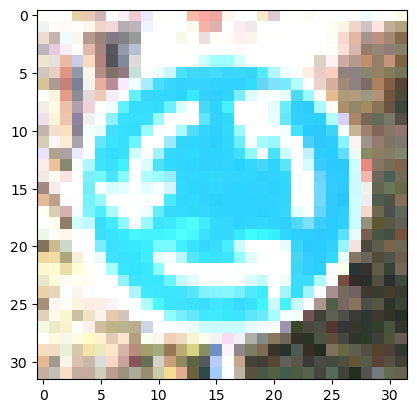

In [7]:
from matplotlib.pyplot import imshow
import numpy as np

imshow(X_train[10])

item, count = np.unique(y_train, return_counts=True)
signs[y_train[16]]

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

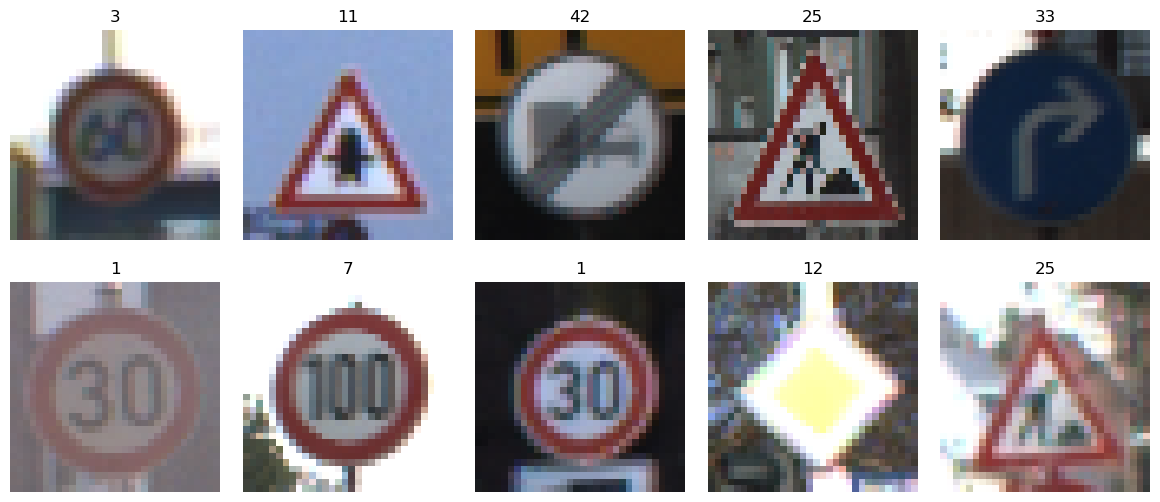

In [8]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
def show_images(X,Y,r,c):
  fig, axs = plt.subplots(r,c, figsize=(15, 6))
  fig.subplots_adjust(hspace = .2, wspace=.001)
  axs = axs.ravel()
  for i in range(10): # if rows = 2 and columns = 5 i should take 10 values
#       plt.subplot(2,5,i+1)
      index = np.random.randint(0, len(X))
      image = X[index]
      axs[i].axis('off')
      axs[i].imshow(image)
      axs[i].set_title(Y[index])
  plt.show()    

# show image of 10 random data points
rows = 2
columns = 5
show_images (X_train, y_train, 2, 5)

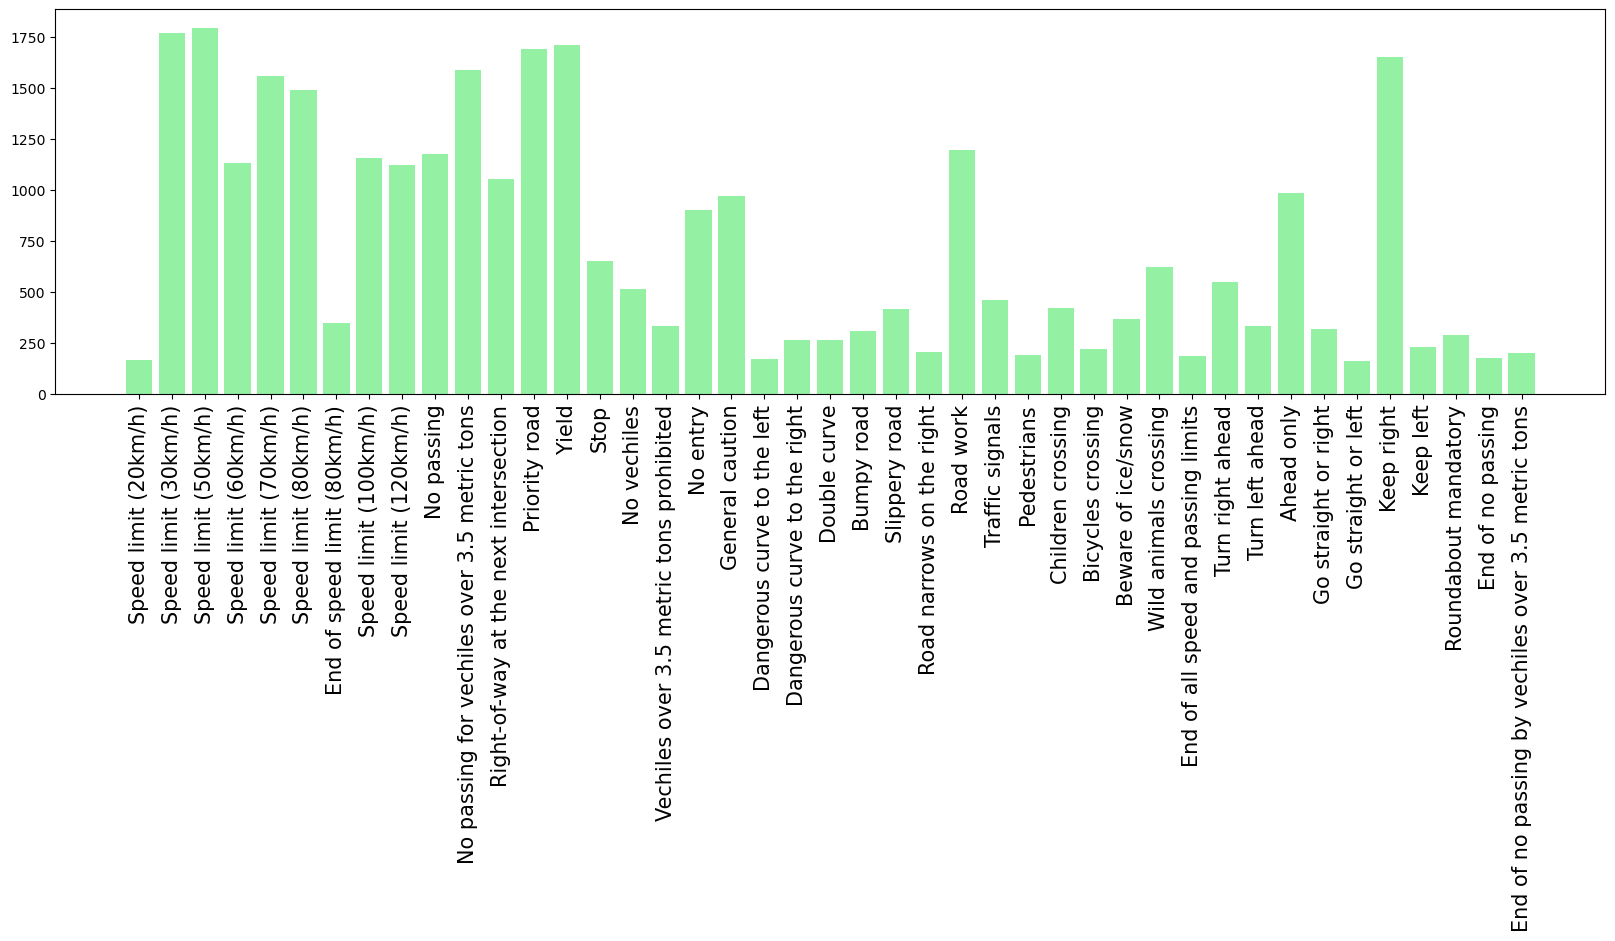

In [9]:
plt.figure(figsize=(20,5))
item, count = np.unique(y_train, return_counts=True)
#names is a list of traffic signs, Remember that we already have a list : signs
names = signs 
y_pos = np.arange(len(names))
plt.bar(item, count, alpha=0.6, color = (0.3,0.9,0.4,0.6) )

plt.xticks(y_pos, names, fontsize=15, rotation=90)

plt.show()

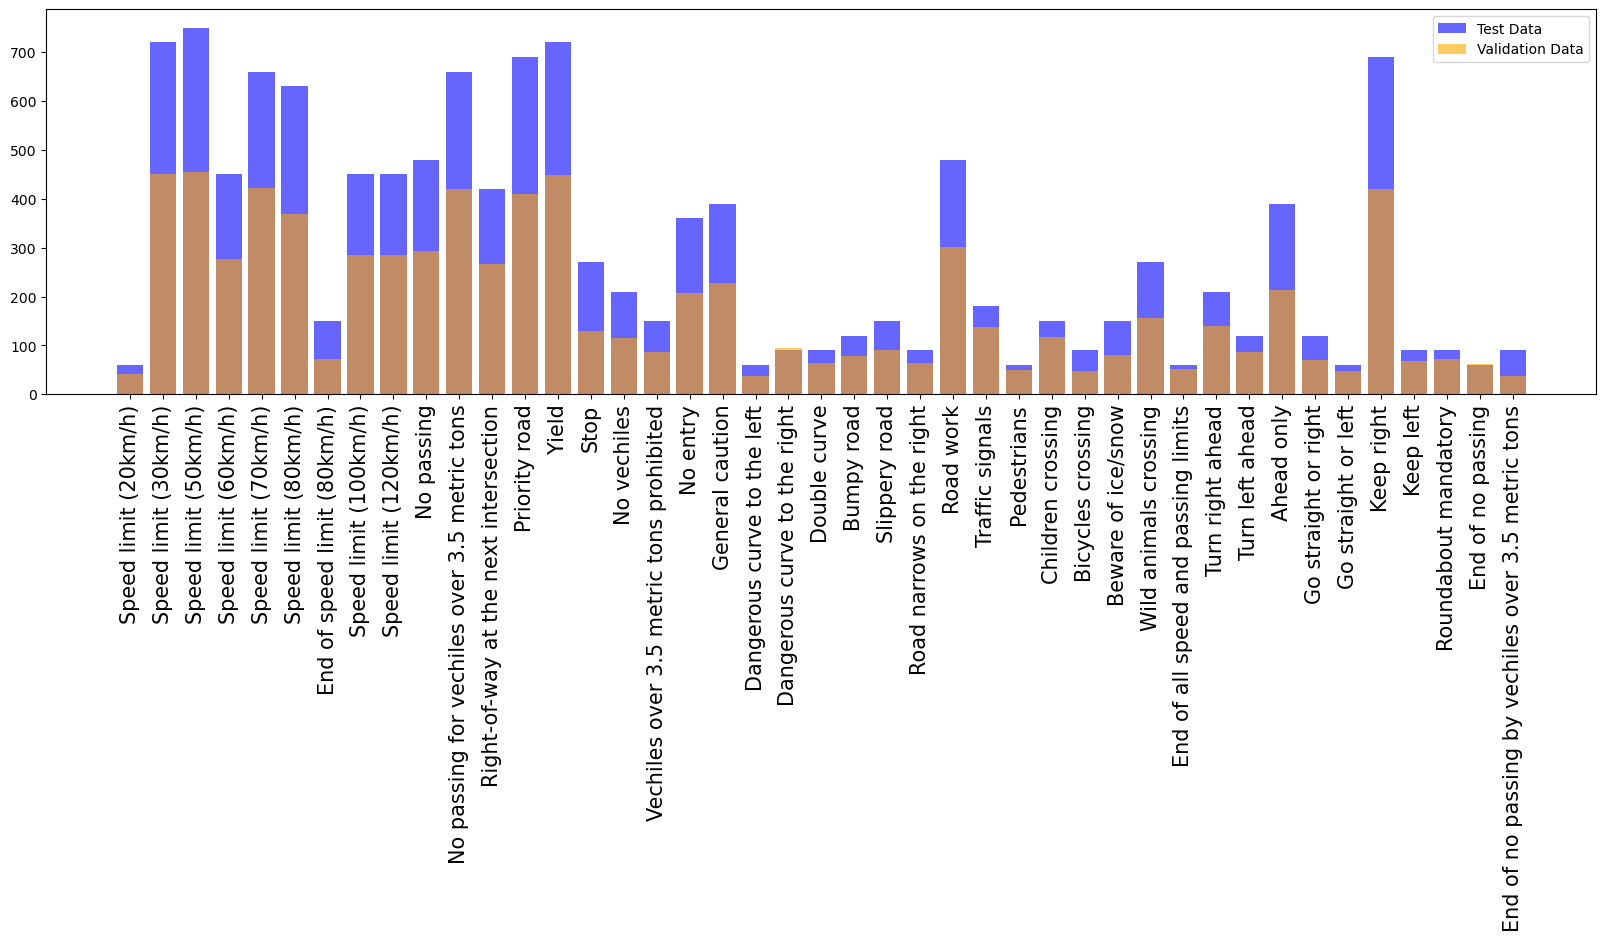

In [10]:
plt.figure(figsize=(20,5))
item, count = np.unique(y_valid, return_counts=True)
item1, count1 = np.unique(y_test, return_counts=True)

names = signs
names1 = signs

y_pos = np.arange(len(names))

plt.bar(item1, count1, alpha=0.6, color = 'blue', label="Test Data" )
plt.bar(item, count, alpha=0.6, color = 'orange', label="Validation Data" )

plt.xticks(y_pos, names, fontsize=15, rotation=90)
plt.legend()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In [11]:
X_train.shape

(31367, 32, 32, 3)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

(31367, 32, 32, 1)


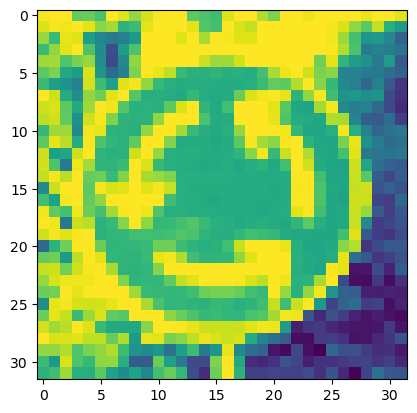

In [12]:
# gray scale
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True) # colored image is 3 while grey is 1
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)

imshow(X_train_gry[10])
print(X_train_gry.shape)

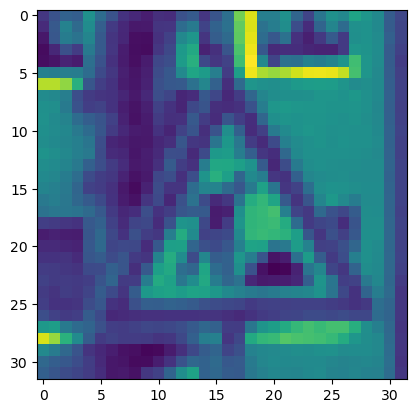

In [90]:
# normalization Here 

X_test_nor = ((X_test_gry) - 128)/128
X_train_nor = ((X_train_gry) -128)/128
X_valid_nor = ((X_valid_gry) -128)/128

imshow(X_train_nor[11])

In [71]:
X_train_nor.shape

(31367, 32, 32, 1)

In [13]:
# In this part you should One-hot encode all Y-s vectors using
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)
y_test = to_categorical(y_test, 43)
print(y_valid)


2023-01-03 16:32:48.899486: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 16:32:49.532303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-03 16:32:49.532355: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-03 16:32:51.168722: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [27]:
pip install opencv-python opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 1.7 MB/s eta 0:00:0000:0100:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 1.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 1.2 MB/s eta 0:00:0000:0100:02
Note: you may need to restart the kernel to use updated packages.


In [29]:
# import cv2

# def random_translate(img):
#     rows,cols,_ = img.shape
    
#     # allow translation up to px pixels in x and y directions
#     px = 2
#     dx,dy = np.random.randint(-px,px,2)

#     M = np.float32([[1,0,dx],[0,1,dy]])
#     dst = cv2.warpAffine(img,M,(cols,rows))
    
#     dst = dst[:,:,np.newaxis]
    
#     return dst

Next cells should be useful for data augmentation

In [30]:
# def random_scaling(img):   
#     rows,cols,_ = img.shape

#     # transform limits
#     px = np.random.randint(-2,2)

#     # ending locations
#     pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

#     # starting locations (4 corners)
#     pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

#     M = cv2.getPerspectiveTransform(pts1,pts2)

#     dst = cv2.warpPerspective(img,M,(rows,cols))
    
#     dst = dst[:,:,np.newaxis]
    
#     return dst

In [31]:
# def random_warp(img):
    
#     rows,cols,_ = img.shape

#     # random scaling coefficients
#     rndx = np.random.rand(3) - 0.5
#     rndx *= cols * 0.06   # this coefficient determines the degree of warping
#     rndy = np.random.rand(3) - 0.5
#     rndy *= rows * 0.06

#     # 3 starting points for transform, 1/4 way from edges
#     x1 = cols/4
#     x2 = 3*cols/4
#     y1 = rows/4
#     y2 = 3*rows/4

#     pts1 = np.float32([[y1,x1],
#                        [y2,x1],
#                        [y1,x2]])
#     pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
#                        [y2+rndy[1],x1+rndx[1]],
#                        [y1+rndy[2],x2+rndx[2]]])

#     M = cv2.getAffineTransform(pts1,pts2)

#     dst = cv2.warpAffine(img,M,(cols,rows))
    
#     dst = dst[:,:,np.newaxis]
    
#     return dst

In [32]:
# def random_brightness(img):
#     shifted = img + 1.0   # shift to (0,2) range
#     img_max_value = max(shifted.flatten())
#     max_coef = 2.0/img_max_value
#     min_coef = max_coef - 0.1
#     coef = np.random.uniform(min_coef, max_coef)
#     dst = shifted * coef - 1.0
#     return dst

In [70]:
# Data augmentation 
# This may take too much time...
# i've set 2000 as a minimum number of images for each class
# # if u don't already have a file containing generated Data, Run ME please
# # --------------------------!!!!-----------------------------------------

# input_indices = []
# output_indices = []

# for class_n in range(n_classes):
#     class_indices = np.where(y_train == class_n)
#     n_samples = len(class_indices[0])
# #     if n_samples < :2000
# #         for i in range(2000 - n_samples):
# #             input_indices.append(class_indices[0][i%n_samples])
# #             output_indices.append(new_X_train.shape[0])
# #             new_img = new_X_train[class_indices[0][i % n_samples]]
# #             new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
# #             new_X_train = np.concatenate((new_X_train, [new_img]), axis=0)
# #             y_train = np.concatenate((y_train, [class_n]), axis=0)

            
# # data_file = 'new_train.p'
# # open(data_file, 'wb')
# # pickle.dump({'images':new_X_train, 'labels':y_train}, protocol = 4)
# # # pickle.dump({"images":new_X_train,"labels":y_train},open(data_file,"wb"),protocol=4)

In [ ]:
# # if u do have a file that contains new_train data RUN ME
# with open("/content/gdrive/My Drive/traffic-signs-data/new_train.p","rb") as f:
#     data = pickle.load(f)
# new_X_train,y_train = data["images"],data["labels"]


In [ ]:
# shuffle data  
# CODE

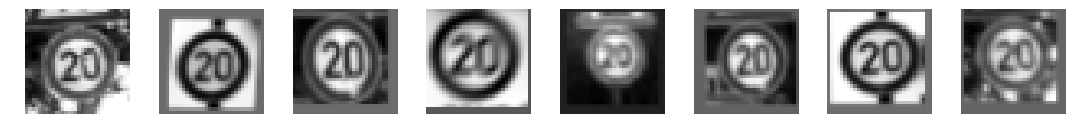

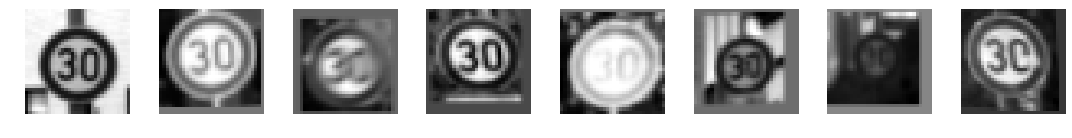

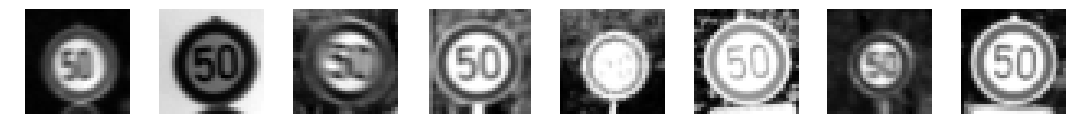

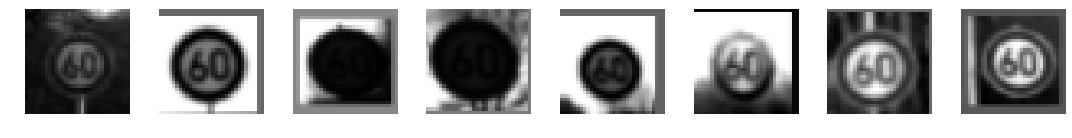

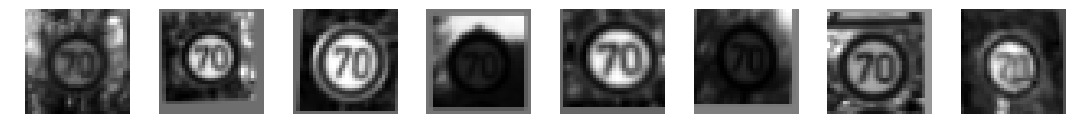

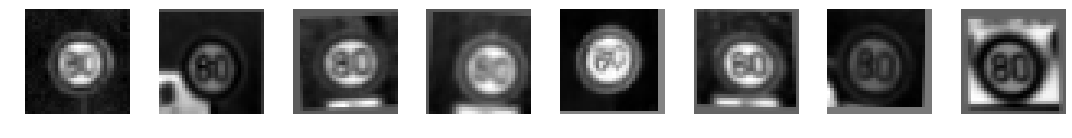

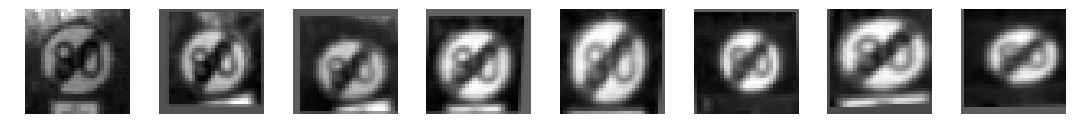

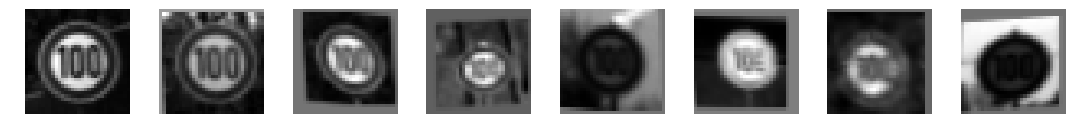

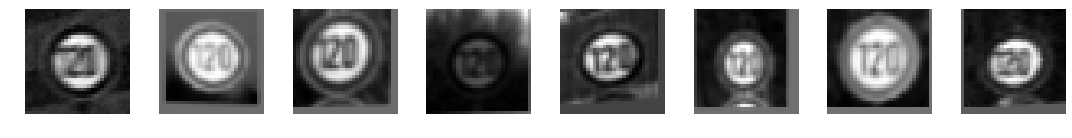

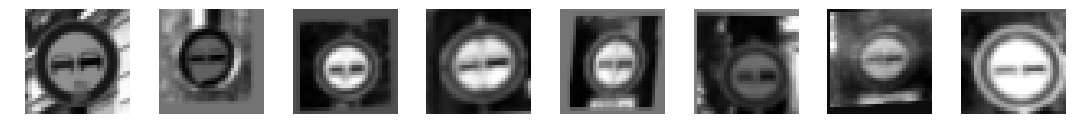

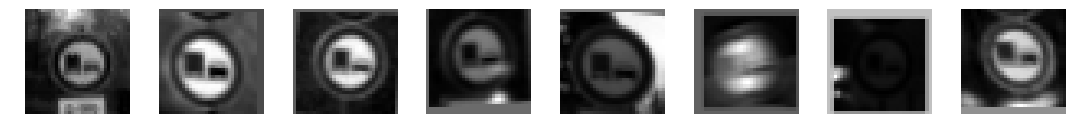

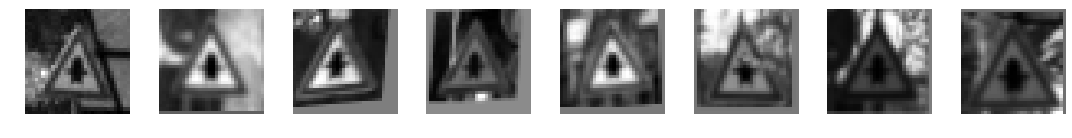

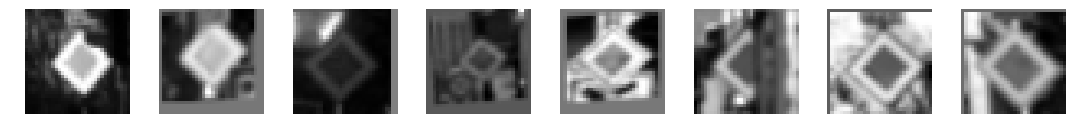

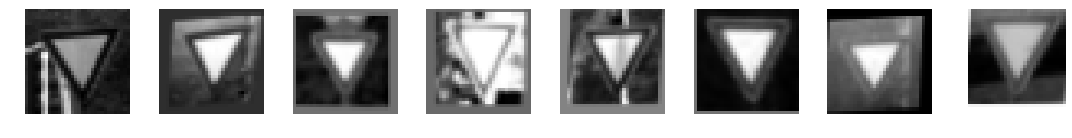

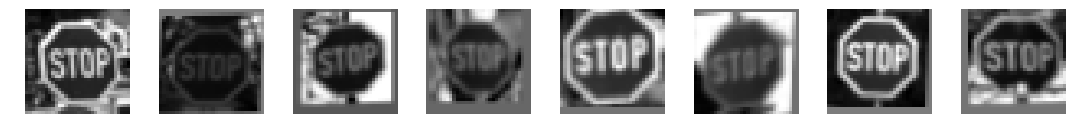

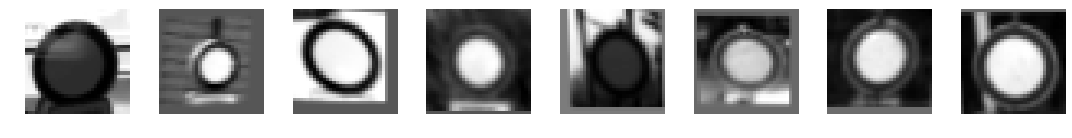

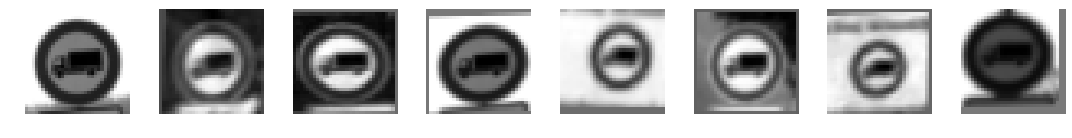

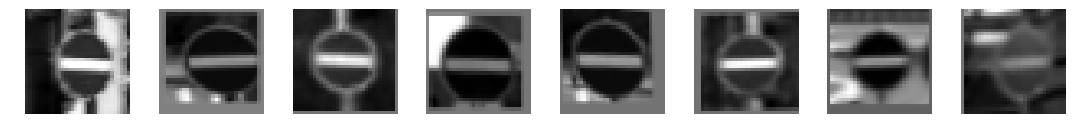

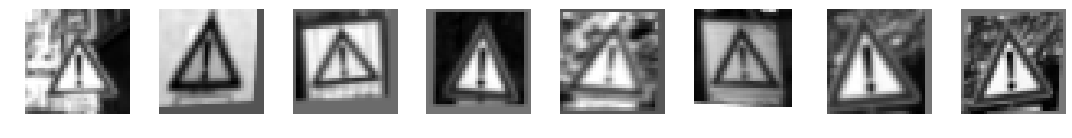

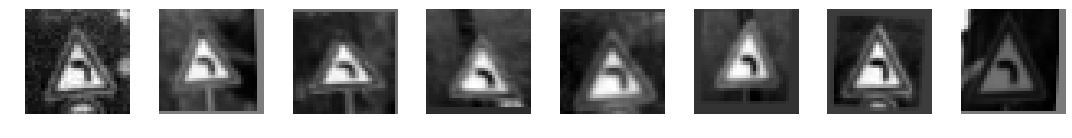

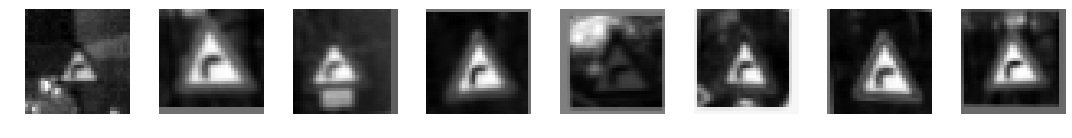

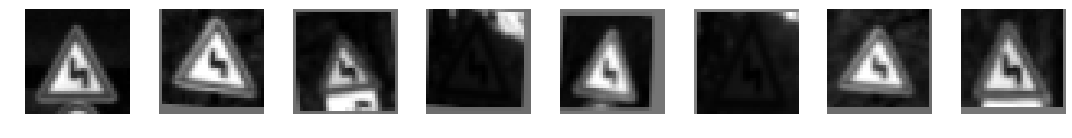

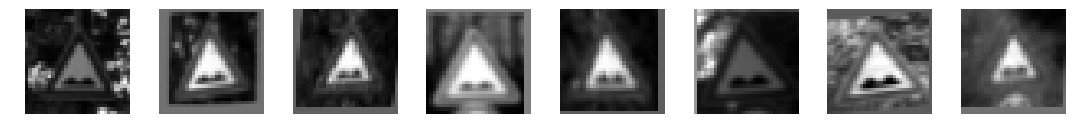

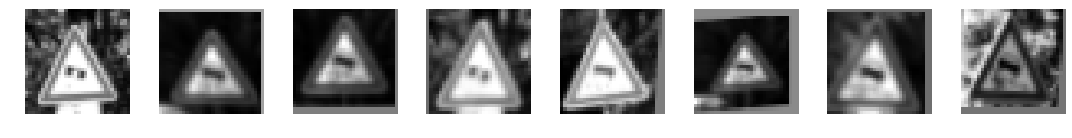

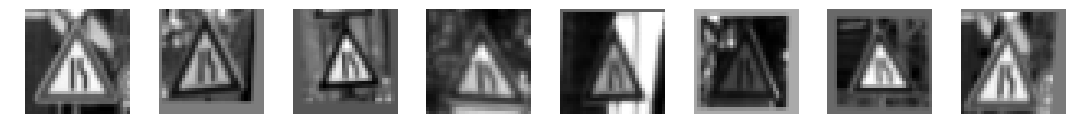

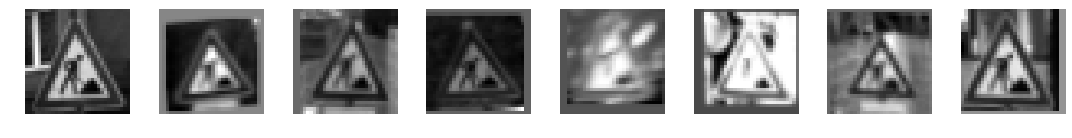

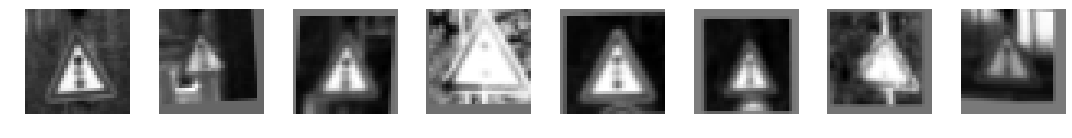

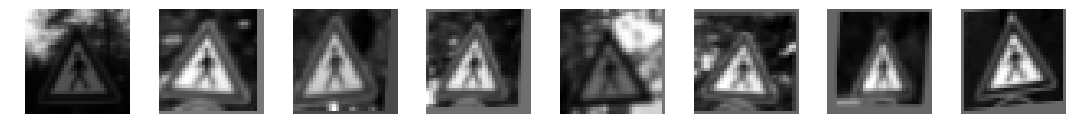

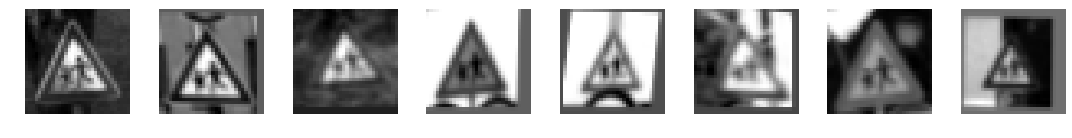

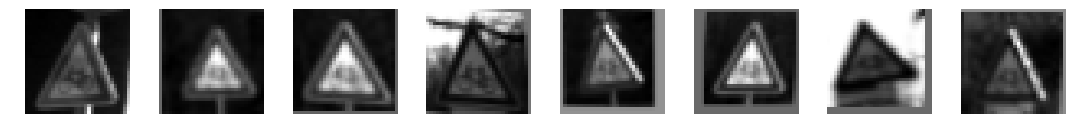

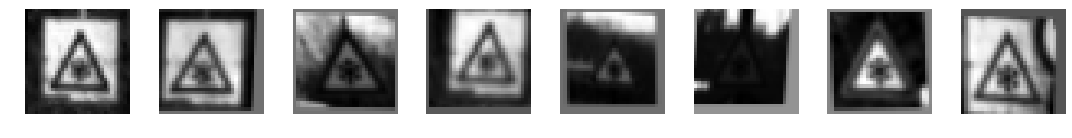

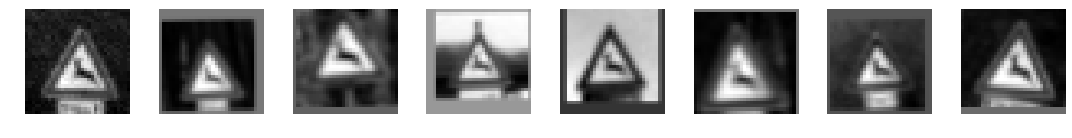

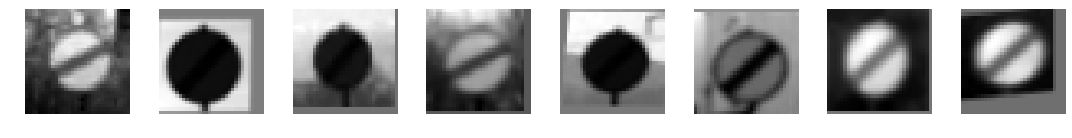

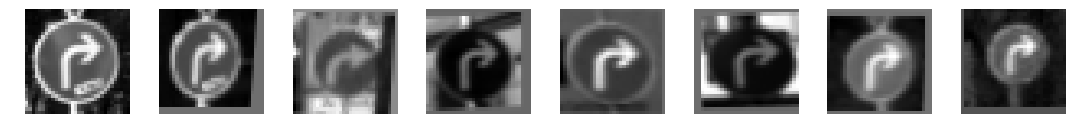

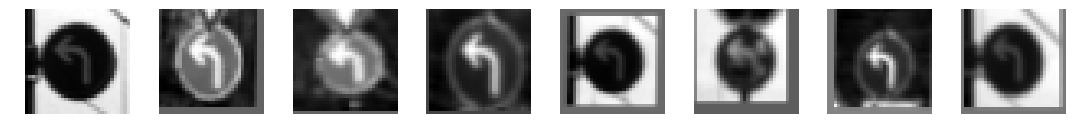

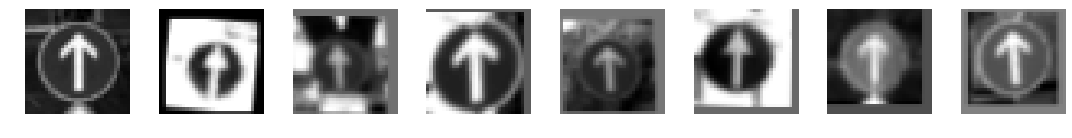

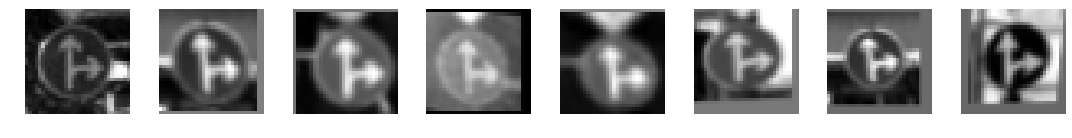

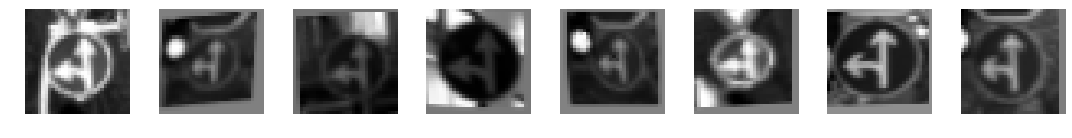

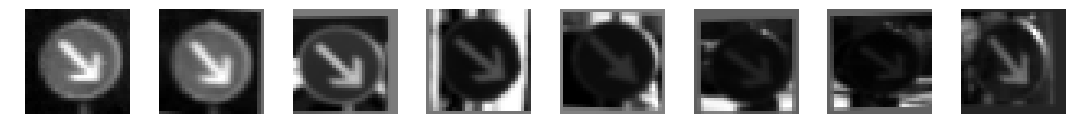

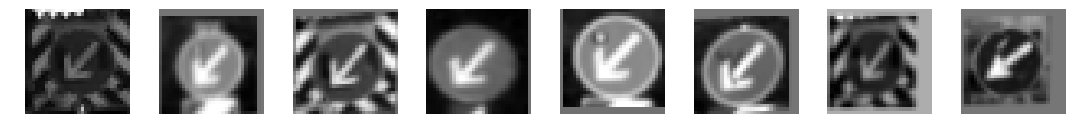

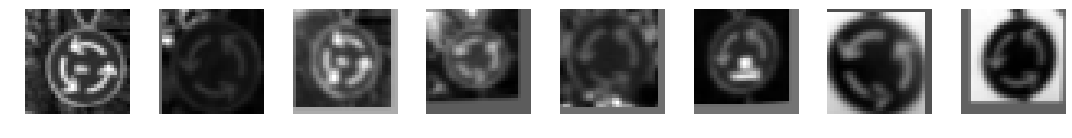

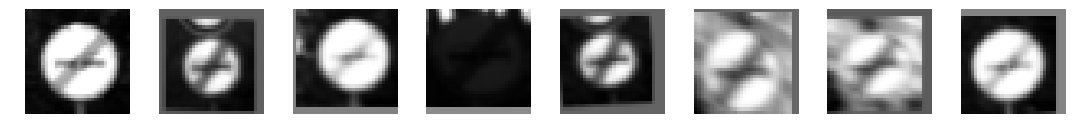

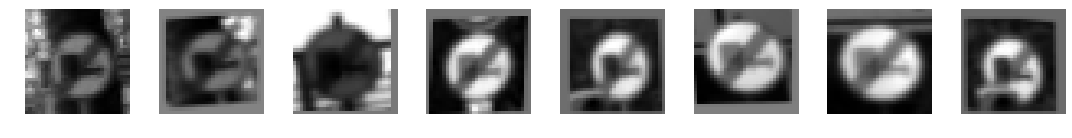

In [ ]:
# def plot_figures_no_labels(figures, nrows = 1, ncols=1):
#     fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 15))
#     axs = axs.ravel()
#     for index, title in zip(range(len(figures)), figures):
#         axs[index].imshow(figures[title], plt.gray())
#         axs[index].set_axis_off()
        
#     plt.tight_layout()
#     plt.show()
    
# for class_n in None: # you should range for all classes 
#   figures = {}

#   class_indices = list (np.where(y_train == class_n)[0])
  
#   for i in range(8):
    
#         figures[i] = new_X_train[class_indices[-i]].squeeze()
      
#   plot_figures_no_labels(figures, 1, 8)

      


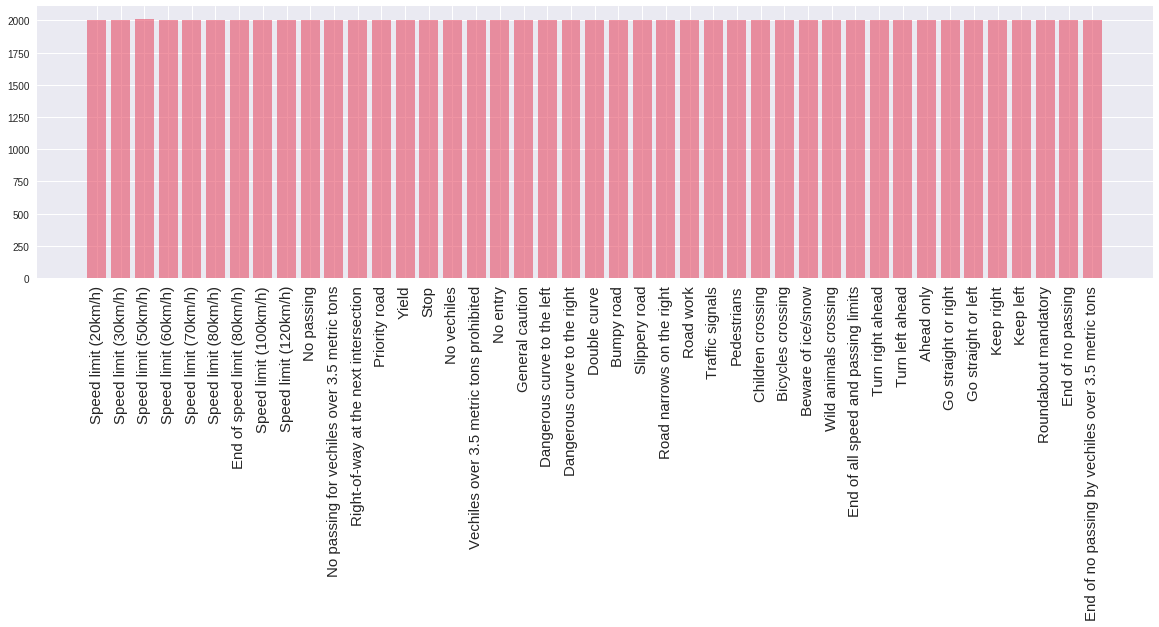

In [ ]:
# plt.figure(figsize=(20,5))
# item, count = np.unique(y_train, return_counts=True)
# names = None
# y_pos = np.arange(len(names))
# plt.bar(None, None, alpha=0.6, color = (0.9,0.3,0.4,0.6) )
# plt.xticks(y_pos, names, fontsize=15, rotation=90)
# plt.show()

### Model Architecture

In [88]:
y_valid.shape


(7842, 43)

In [16]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.1))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [18]:
from keras.metrics import categorical_crossentropy

model.compile(loss = categorical_crossentropy, 
                optimizer = 'adam', 
                metrics = ['accuracy']) 

In [20]:

epochs = 20
history = model.fit(X_train_gry, y_train, batch_size=64, epochs=epochs, 
                    validation_data=(X_valid_gry, y_valid), verbose = 1)



Epoch 1/20
491/491 [==============================] - 100s 200ms/step - loss: 1.3155 - accuracy: 0.6734 - val_loss: 0.1831 - val_accuracy: 0.9587
Epoch 2/20
491/491 [==============================] - 97s 197ms/step - loss: 0.2879 - accuracy: 0.9194 - val_loss: 0.0982 - val_accuracy: 0.9772
Epoch 3/20
491/491 [==============================] - 97s 198ms/step - loss: 0.1948 - accuracy: 0.9448 - val_loss: 0.0788 - val_accuracy: 0.9797
Epoch 4/20
491/491 [==============================] - 97s 199ms/step - loss: 0.1223 - accuracy: 0.9643 - val_loss: 0.0381 - val_accuracy: 0.9911
Epoch 5/20
491/491 [==============================] - 97s 198ms/step - loss: 0.1002 - accuracy: 0.9696 - val_loss: 0.0422 - val_accuracy: 0.9895
Epoch 6/20
491/491 [==============================] - 98s 199ms/step - loss: 0.0846 - accuracy: 0.9747 - val_loss: 0.0412 - val_accuracy: 0.9894
Epoch 7/20
491/491 [==============================] - 98s 199ms/step - loss: 0.0832 - accuracy: 0.9756 - val_loss: 0.0546 - val_a

### Train, Validate and Test the Model

In [ ]:
#Training

 

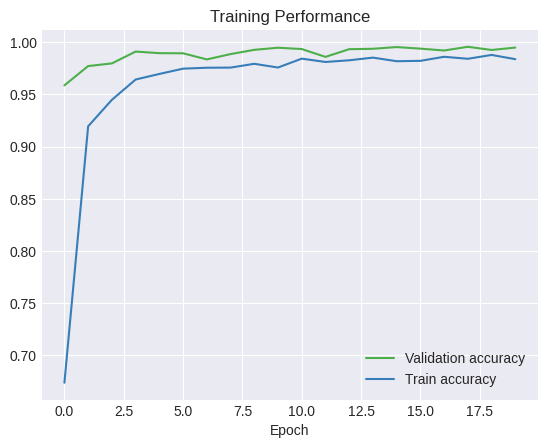

In [25]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.plot(history.history['val_accuracy'], label='Validation accuracy', color = palette(2))
plt.plot(history.history['accuracy'], label='Train accuracy', color = palette(1))
plt.title("Training Performance")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [26]:
predict = model.predict(X_test_gry)

395/395 [==============================] - 6s 16ms/step


In [32]:
predicted = np.argmax(predict, axis = 1)
predicted_cat = to_categorical(predicted, 43)
predicted_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

12630


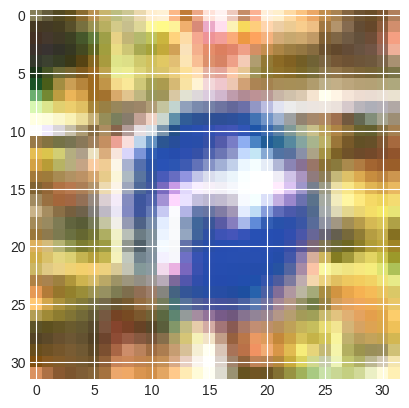

In [54]:
# y_test_arg = np.argmax(y_test, axis = 1)
# y_test_arg

print(y_test.shape[0])
imshow(X_test[3])

In [40]:
# Test
# Can you do better than me?   

test_loss, test_accuracy = model.evaluate(X_test_gry, y_test, batch_size = 16)
print(test_accuracy)

790/790 [==============================] - 7s 9ms/step - loss: 0.2515 - accuracy: 0.9675
0.9675375819206238


In [41]:

from sklearn.metrics import accuracy_score

print('Test Data accuracy: ',accuracy_score(y_test, predicted_cat)*100)

Test Data accuracy:  96.75376088677751


<AxesSubplot:>

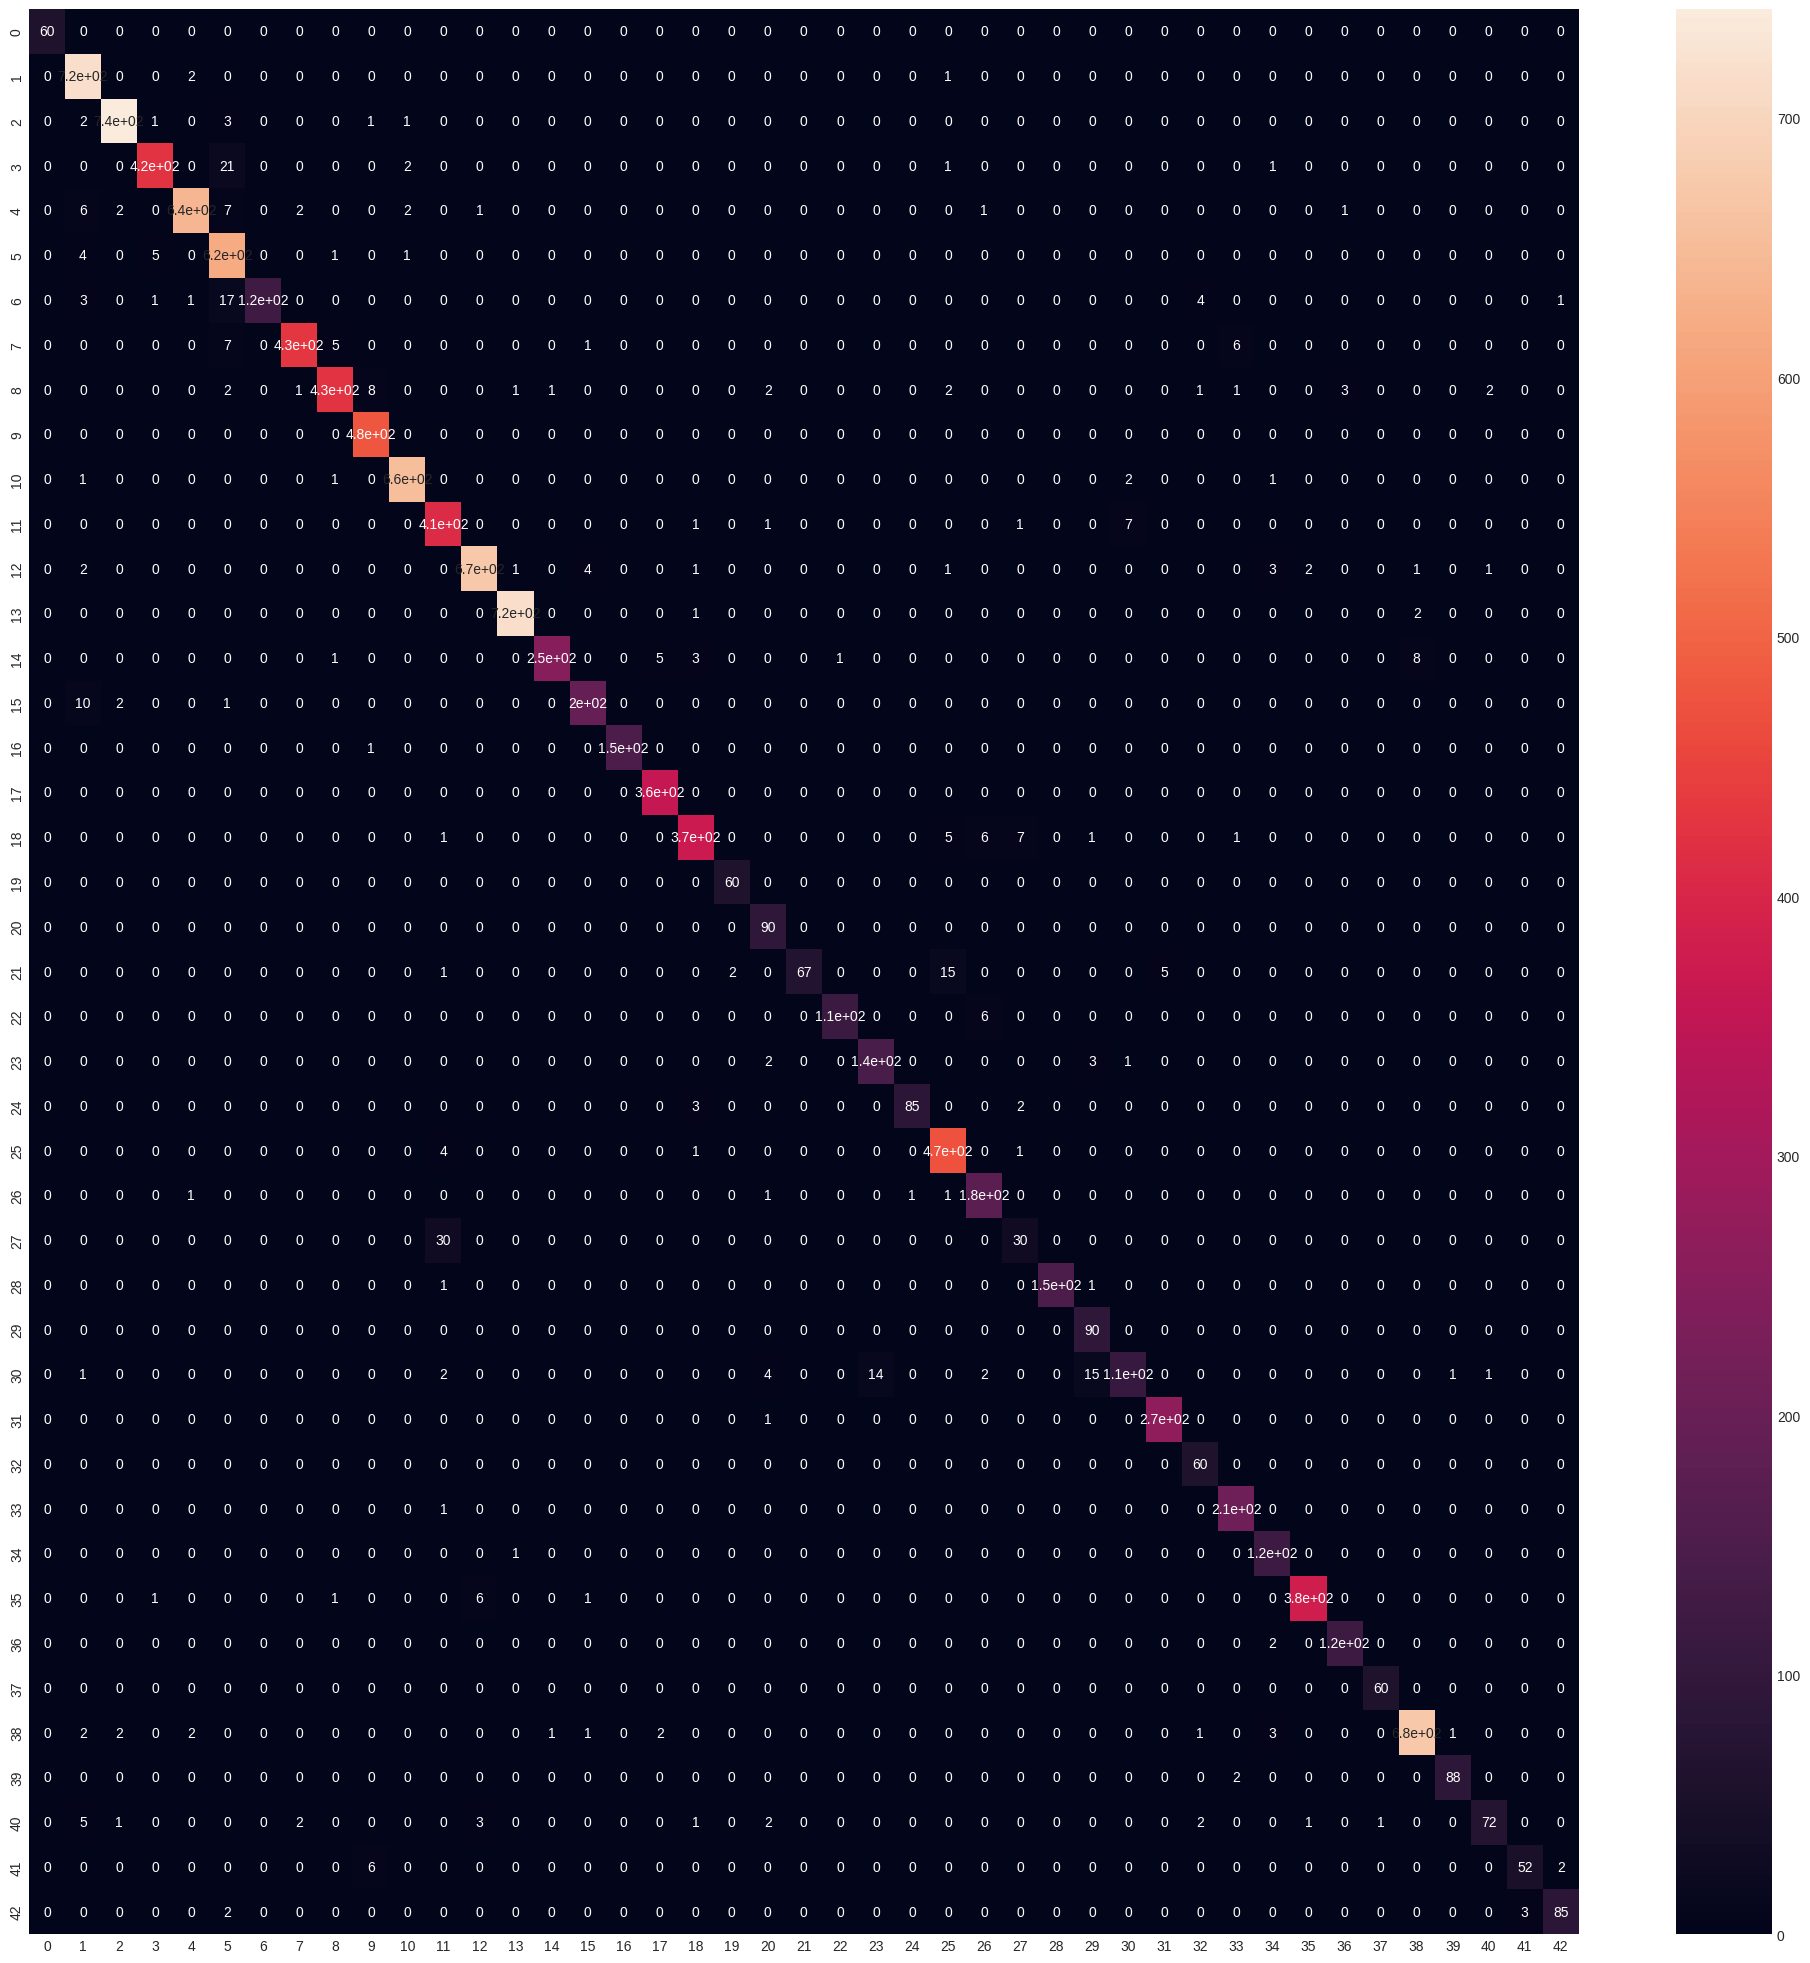

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_classes = predicted
y_true = np.argmax(y_test, axis = 1)

cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

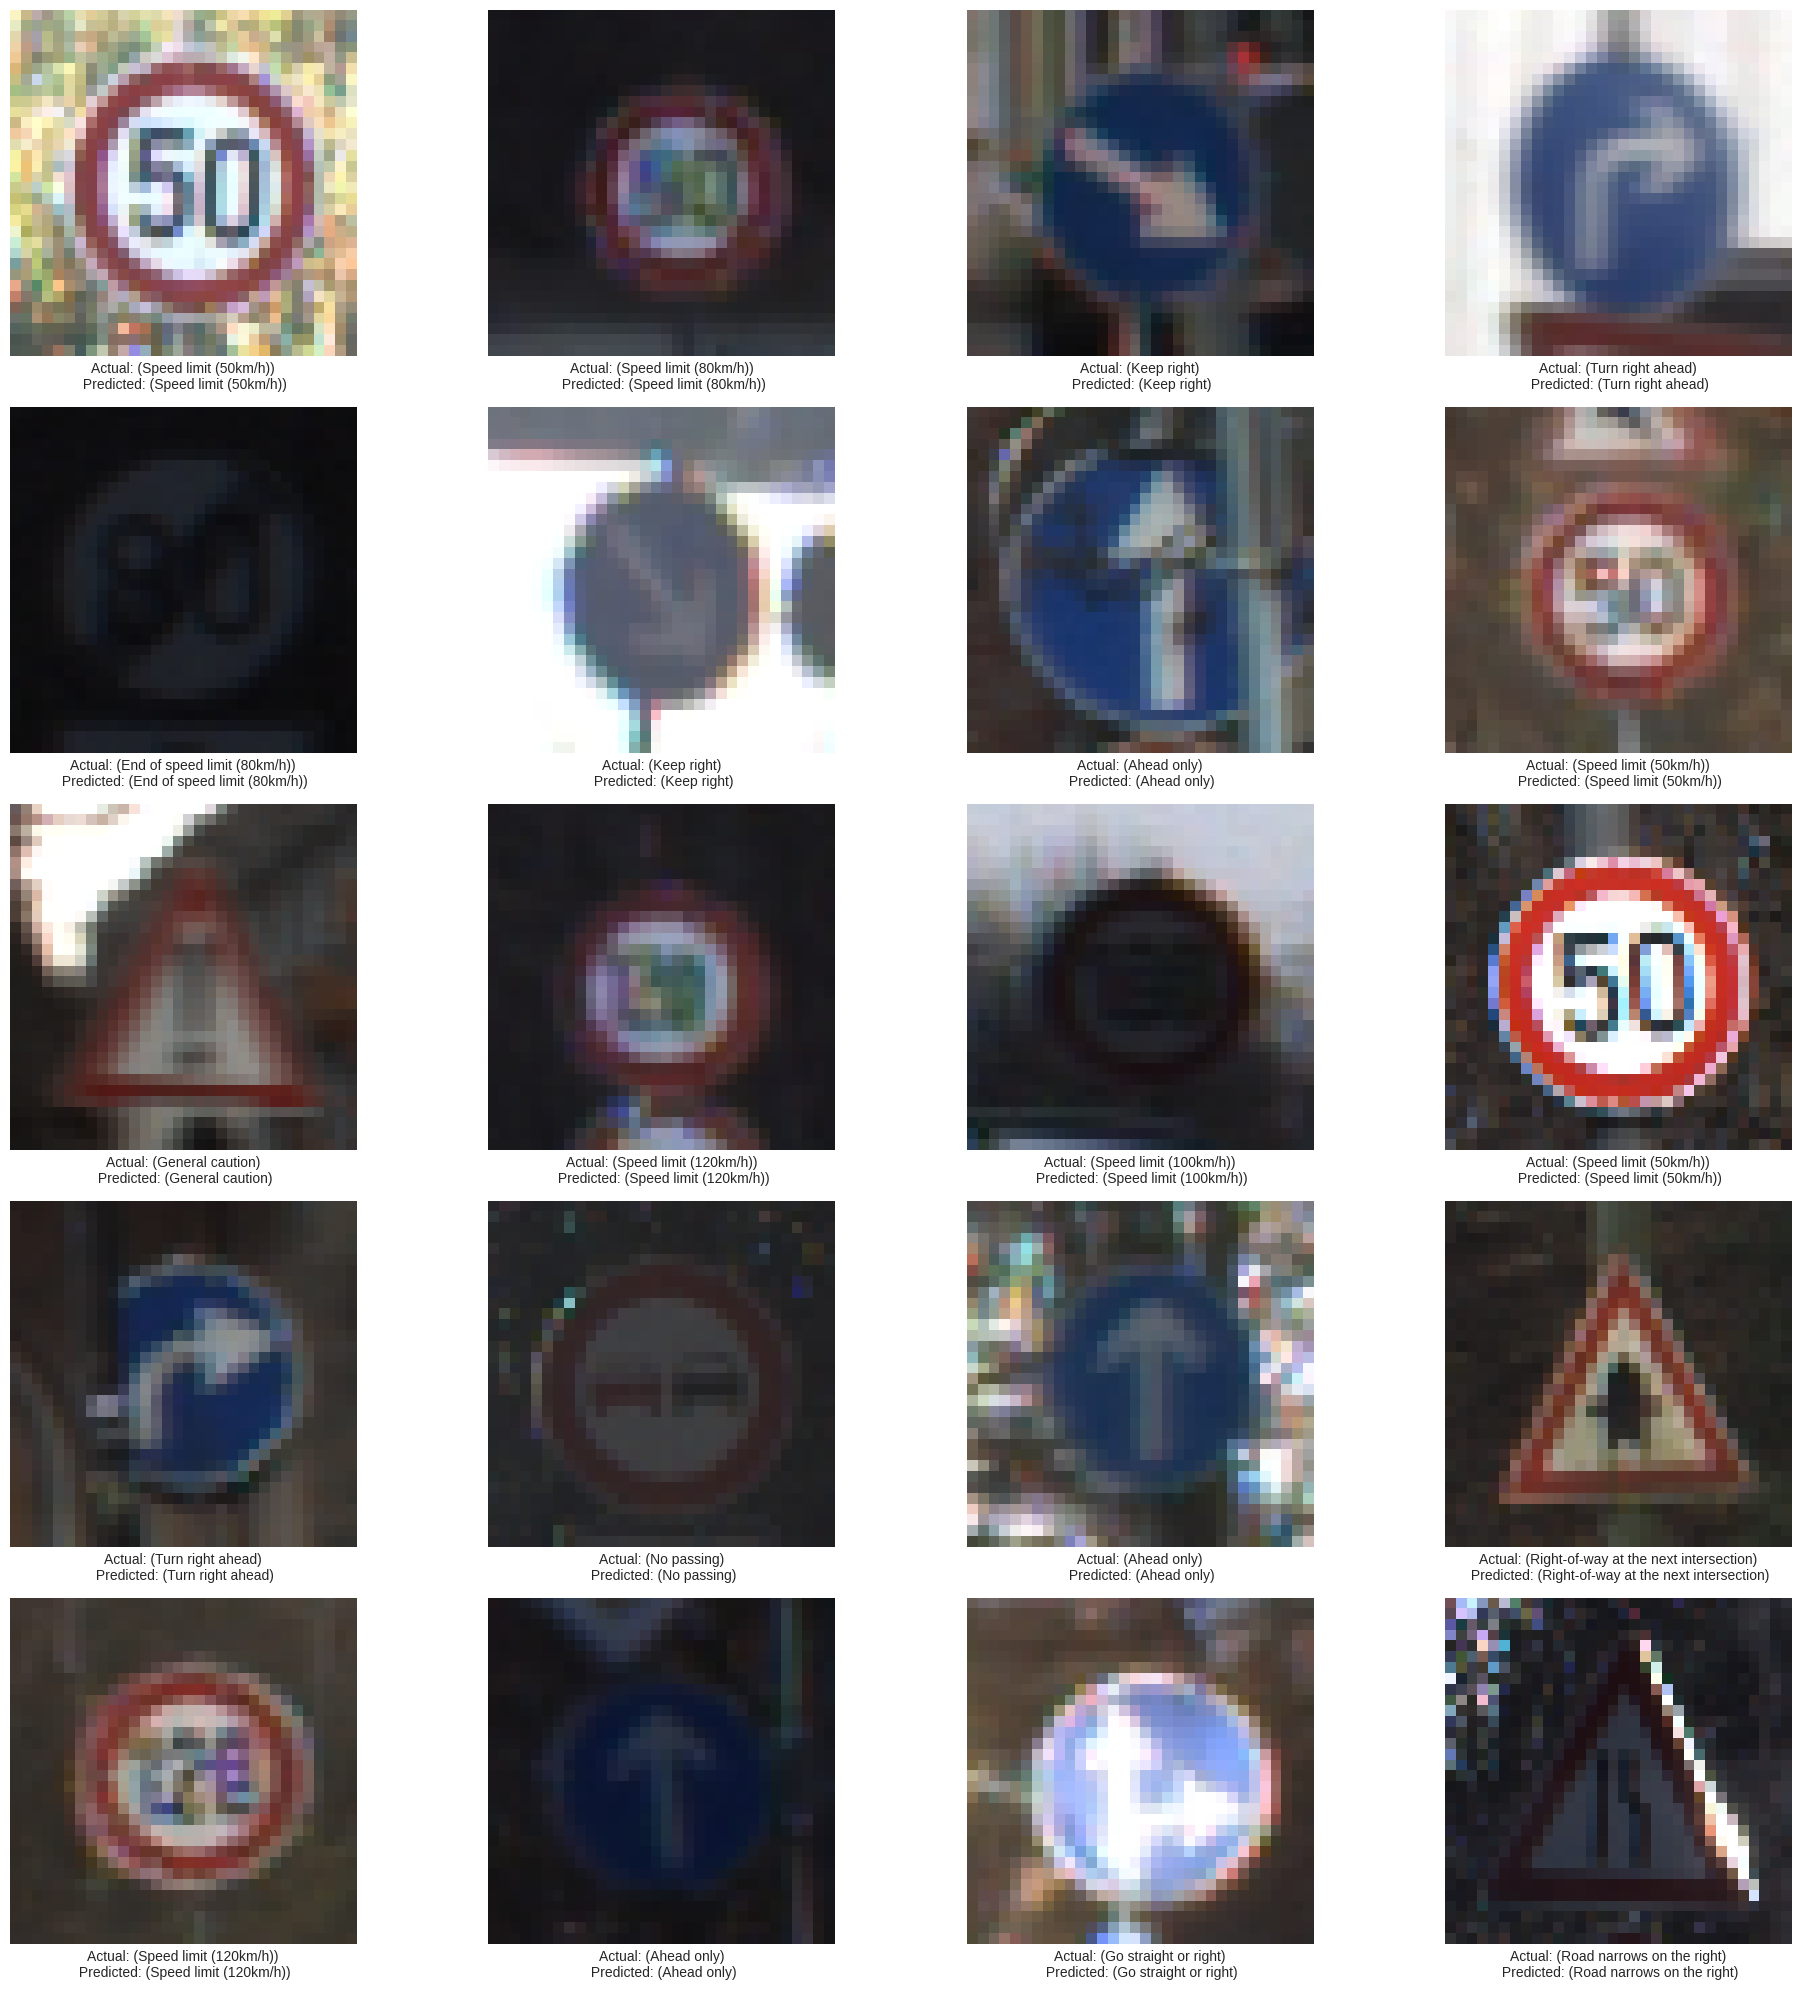

In [57]:
# PLOT IMAGES WITH PREDICTED SIGNS

plt.figure(figsize=(20,20)) # setting the size of the image

for i in range(20): # indicating number of images to show
    plt.subplot(5, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
   
    img_index = np.random.randint(0, 12630)
    plt.imshow((X_test[img_index]), cmap=plt.cm.gray)
   

    plt.xlabel("Actual: ({})\n Predicted: ({})".format(
        signs[(y_true[img_index])], signs[(predicted_classes[img_index])]))
   
   
plt.tight_layout()
plt.show()



A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }